# Grover's algorithm

## An SAT problem

In [1]:
with open('examples/3sat.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs) # let's see what we have

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


## The program

### Example

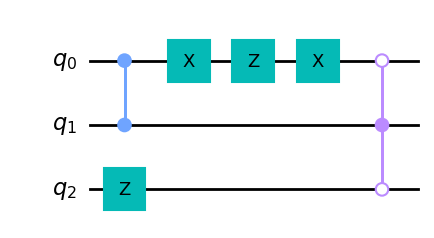

In [2]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('examples/3sat.dimacs')
oracle.draw(output='mpl')

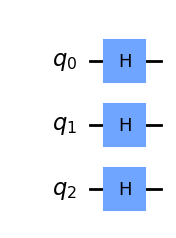

In [3]:
from qiskit import QuantumCircuit
init = QuantumCircuit(3)
init.h([0, 1, 2])
init.draw(output='mpl')

In [4]:
# step 2 & 3 of the algorithm
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)

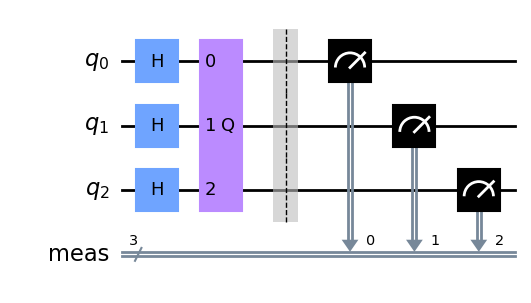

In [5]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw(output='mpl')

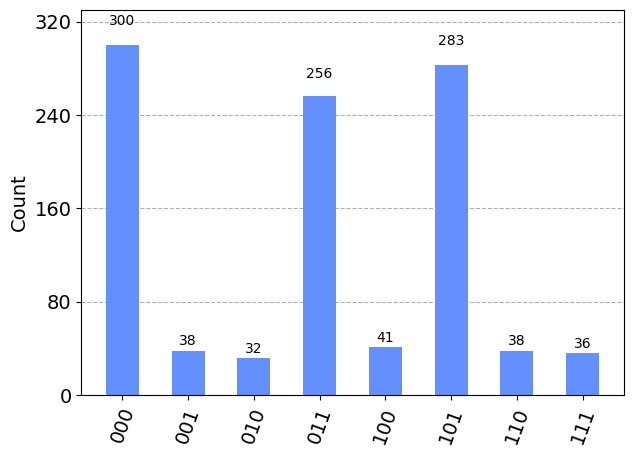

In [6]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# Plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### From scratch

In [7]:
from qiskit import QuantumCircuit

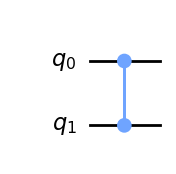

In [8]:
oracle = QuantumCircuit(2)
oracle.cz(0, 1) # invert phase of |11>
oracle.draw(output='mpl')

In [9]:
def display_unitary(qc, prefix=""):
    """Simulate the circuit and display the unitary matrix.

    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix.
        prefix (str): Optional LaTeX prefix for the matrix.
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect.
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))
    
display_unitary(oracle, "U_\\text{oracle} = ")

<IPython.core.display.Latex object>

> Exercice

In [13]:
oracle_00 = QuantumCircuit(2)
oracle_00.x([0, 1])
oracle_00.cz(0, 1)
oracle_00.x([0, 1])

display_unitary(oracle_00, "U_\\text{oracle |00>} = ")

<IPython.core.display.Latex object>

In [16]:
oracle_01 = QuantumCircuit(2)
oracle_01.x(1)
oracle_01.cz(0, 1)
oracle_01.x(1)

display_unitary(oracle_01, "U_\\text{oracle |01>} = ")

<IPython.core.display.Latex object>

In [17]:
oracle_10 = QuantumCircuit(2)
oracle_10.x(0)
oracle_10.cz(0, 1)
oracle_10.x(0)

display_unitary(oracle_10, "U_\\text{oracle |10>} = ")

<IPython.core.display.Latex object>

> Retour au cours

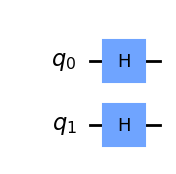

In [18]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.draw(output='mpl')

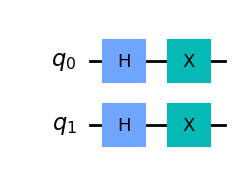

In [19]:
diffuser.x([0, 1])
diffuser.draw(output='mpl')

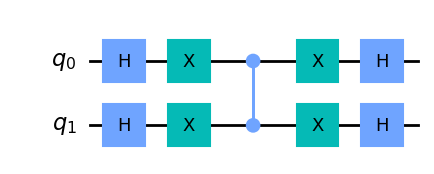

In [20]:
diffuser.cz(0, 1)
diffuser.x([0, 1])
diffuser.h([0, 1])
diffuser.draw(output='mpl')

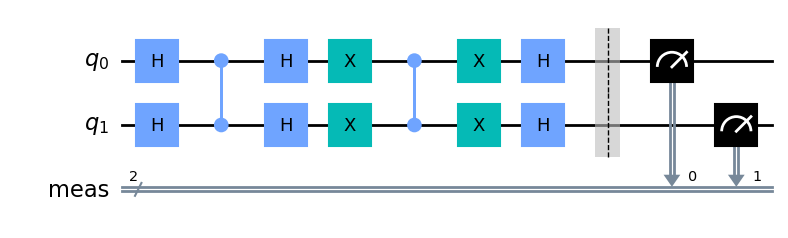

In [22]:
grover = QuantumCircuit(2)
grover.h([0, 1]) # initialize |s>
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw(output='mpl')

In [23]:
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

> Exercice avec les autres oracles

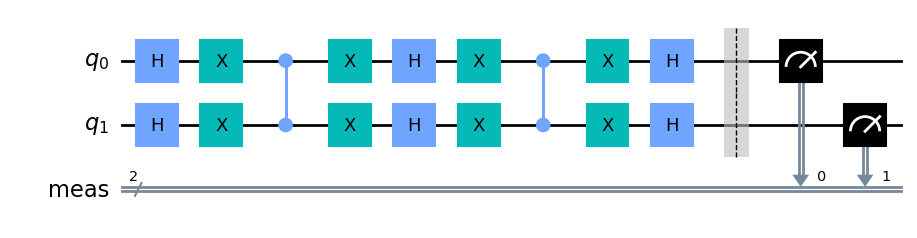

{'00': 1024}

In [25]:
grover_00 = QuantumCircuit(2)
grover_00.h([0, 1]) # initialize |s>
grover_00 = grover_00.compose(oracle_00)
grover_00 = grover_00.compose(diffuser)
grover_00.measure_all()
display(grover_00.draw(output='mpl'))

sim = Aer.get_backend('aer_simulator')
sim.run(grover_00).result().get_counts()

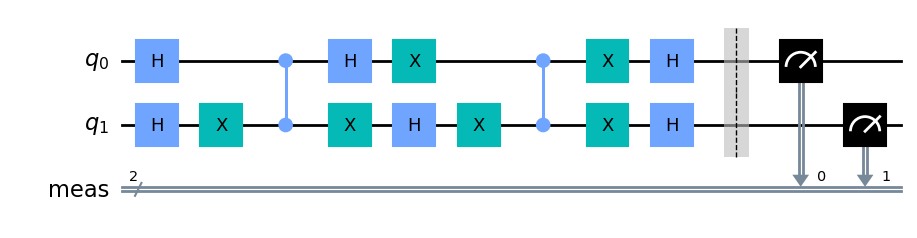

{'01': 1024}

In [26]:
grover_01 = QuantumCircuit(2)
grover_01.h([0, 1]) # initialize |s>
grover_01 = grover_01.compose(oracle_01)
grover_01 = grover_01.compose(diffuser)
grover_01.measure_all()
display(grover_01.draw(output='mpl'))

sim = Aer.get_backend('aer_simulator')
sim.run(grover_01).result().get_counts()

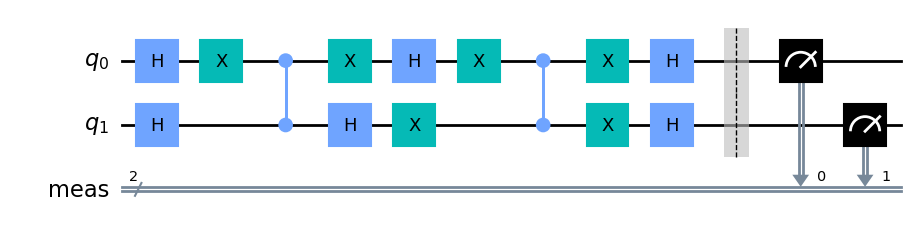

{'10': 1024}

In [27]:
grover_10 = QuantumCircuit(2)
grover_10.h([0, 1]) # initialize |s>
grover_10 = grover_10.compose(oracle_10)
grover_10 = grover_10.compose(diffuser)
grover_10.measure_all()
display(grover_10.draw(output='mpl'))

sim = Aer.get_backend('aer_simulator')
sim.run(grover_10).result().get_counts()